In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree 
from sklearn.metrics import confusion_matrix

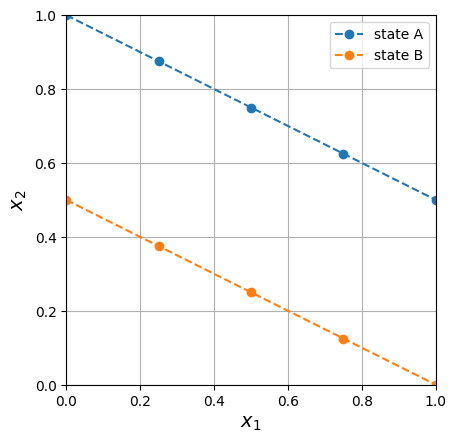

In [3]:
fig,ax = plt.subplots()
x = np.linspace(0,1,5)
ax.plot(x, 1-0.5*x,   marker='o', ls = '--' ,label='state A')
ax.plot(x, 0.5-0.5*x, marker='o', ls = '--' , label='state B')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel(r'$x_1$', fontsize=14)
ax.set_ylabel(r'$x_2$', fontsize=14)
ax.set_aspect('equal')
ax.grid()
ax.legend()
fig.savefig('Pics/two_state_system.pdf')
plt.show()

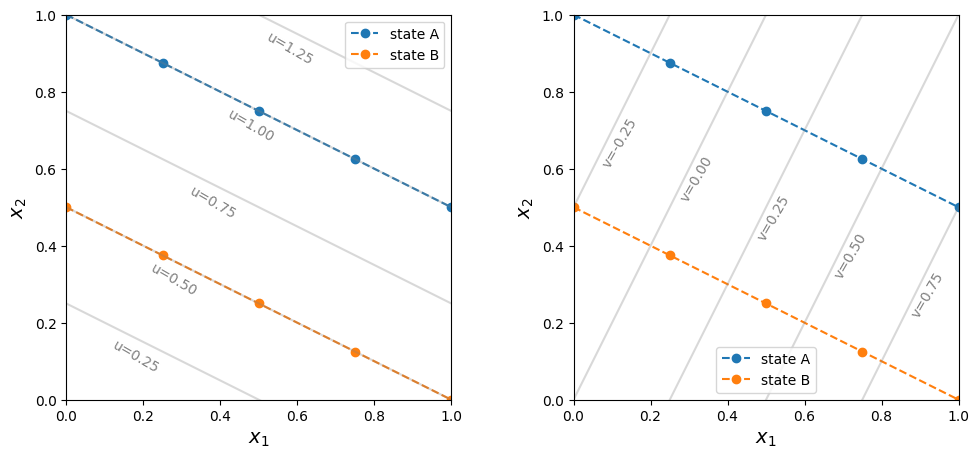

In [4]:
fig,ax = plt.subplots(ncols=2 ,figsize=(12,5))
x = np.linspace(0,1,5)
for ii in range(2):
    ax[ii].plot(x, 1-0.5*x,   marker='o', ls = '--' ,label='state A')
    ax[ii].plot(x, 0.5-0.5*x, marker='o', ls = '--' , label='state B')
    ax[ii].set_xlim(0,1)
    ax[ii].set_ylim(0,1)
    ax[ii].set_xlabel(r'$x_1$', fontsize=14)
    ax[ii].set_ylabel(r'$x_2$', fontsize=14)
    ax[ii].set_aspect('equal')
    ax[ii].legend()

v = np.linspace(-1,2,11)
for ui in [0.25,0.5,0.75,1.0,1.25]:
    ax[0].plot(2*ui/5 + 4*v/5, 4*ui/5 - 2*v/5, color='gray', alpha=0.3)
    vi=0.1
    ax[0].text(2*ui/5 + 4*vi/5, 4*ui/5 - 2*vi/5, f'u={ui:.2f}', color="gray", ha="center", va="top", rotation=-30)
u = np.linspace(-1,2,11)
for vi in np.array([0.25,0.5,0.75,1.0,1.25])-0.5:
    ax[1].plot(2*u/5 + 4*vi/5, 4*u/5 - 2*vi/5, color='gray', alpha=0.3)
    ui=0.8
    ax[1].text(2*ui/5 + 4*vi/5, 4*ui/5 - 2*vi/5, f'v={vi:.2f}', color="gray", ha="center", va="top", rotation=60)
fig.subplots_adjust(hspace=2)
fig.savefig('Pics/two_state_system_1.pdf')
plt.show()

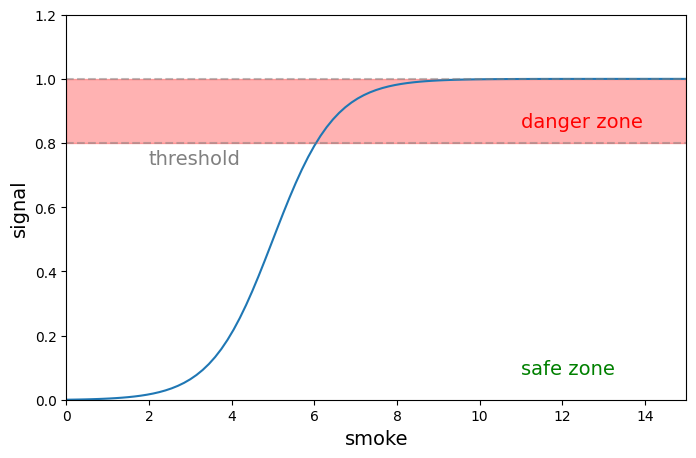

In [47]:
smoke = np.linspace(0,15,101)
signal = np.tanh((smoke-5)/1.5)/2
signal = signal -signal[0]
signal = signal/signal.max()
fig,ax = plt.subplots(figsize=(8,5))
ax.plot(smoke, signal)
ax.set_xlim(0,15)
ax.set_ylim(0,1.2)
ax.axhline(1, ls='--', color='gray', alpha=0.5)
#ax.fill_between(smoke, signal, 1, where=(signal<=1), color='gray', alpha=0.3)
threshold = np.ones_like(smoke)
ax.fill_between(smoke, 0.8*threshold, threshold, color='red', alpha=0.3)
ax.axhline(0.8, ls='--', color='gray', alpha=0.5)
ax.text(11, 0.85, 'danger zone', color='red', fontsize=14)
ax.text(11, 0.08, 'safe zone', color='green', fontsize=14)
ax.text(2, 0.78, 'threshold', color='gray', fontsize=14, va='top')
ax.set_xlabel('smoke', fontsize=14)
ax.set_ylabel('signal', fontsize=14)
fig.savefig('Pics/smoke_signal.pdf')
plt.show()

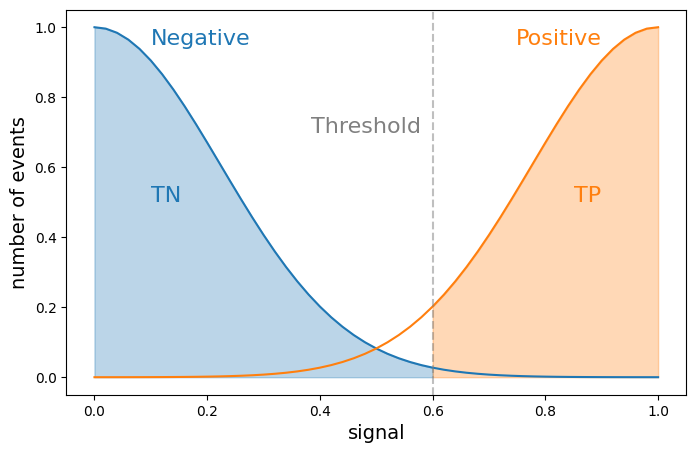

In [97]:
x = np.linspace(0,1,51)
sigma2 = 0.05
y1 = np.exp(-x**2/(2*sigma2))
y2 = np.exp(-(1-x)**2/(2*sigma2))
fig,ax = plt.subplots(figsize=(8,5))
ax.plot(x,y1)
ax.plot(x,y2)
ax.set_xlabel('signal', fontsize=14)
ax.set_ylabel('number of events', fontsize=14)
ax.text(0.1, 0.95, 'Negative', color='C0', fontsize=16, ha='left')
ax.text(0.9, 0.95, 'Positive', color='C1', fontsize=16, ha='right')
ax.text(0.58, 0.7, 'Threshold', color='gray', fontsize=16, ha='right')
ax.text(0.1, 0.5, 'TN', color='C0', fontsize=16, ha='left')
ax.text(0.85, 0.5, 'TP', color='C1', fontsize=16, ha='left')
ax.axvline(0.6, ls='--', color='gray', alpha=0.5)
ax.fill_between(x, 0, y1, where=(x<=0.6), color='C0', alpha=0.3)
ax.fill_between(x, 0, y2, where=(x>=0.6), color='C1', alpha=0.3)

In [191]:
def integrate(x,y):
    integral = y[0]*(x[1]-x[0])/2 + y[-1]*(x[-1]-x[-2])/2
    for ii in range(1,len(x)-1):
        integral += y[ii]*(x[ii+1]-x[ii-1])/2
    return integral

x = np.linspace(0,1,1001)
y = x**2
integrate(x,y)

np.float64(0.33333350000000034)

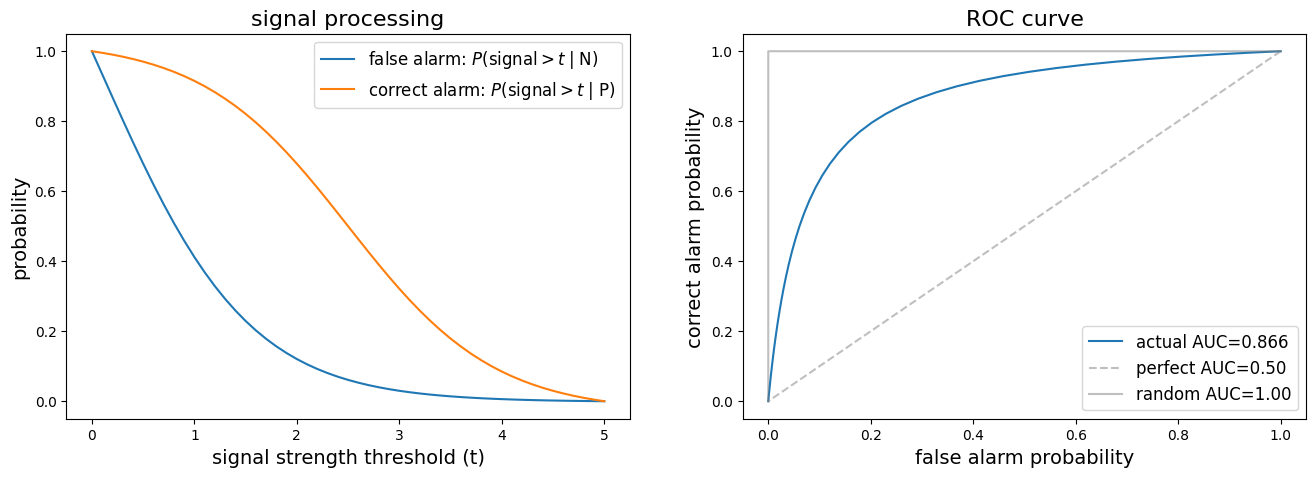

In [209]:
signal_strength = np.linspace(0,5,51)
results = []
w = []
AUC = []
for w1 in [0.0001, 0.7, 5]:
    w.append(w1)
    P1 = 1-np.tanh(w1*(signal_strength-0.1))
    P1 -= min(P1)
    P1 /= max(P1)
    w2 = w1
    P2 = 1-np.tanh(w2*(signal_strength-2.5))
    P2 -= min(P2)
    P2 /= max(P2)
    results.append(np.array([P1,P2]))
    AUC.append(np.abs(integrate(P1,P2)))
fig,ax = plt.subplots(ncols=2, figsize=(16,5))
#ax.set_title('s', fontsize=16)
ax[0].plot(signal_strength, results[1][0], label = 'false alarm: ' +r'$P(\mathrm{signal}>t \;\vert\; \mathrm{N})$')
ax[0].plot(signal_strength, results[1][1], label = 'correct alarm: '+r'$P(\mathrm{signal}>t \;\vert\; \mathrm{P})$')
ax[0].legend(fontsize=12)
ax[0].set_xlabel('signal strength threshold (t)', fontsize=14)
ax[0].set_ylabel('probability', fontsize=14)
ax[0].set_title('signal processing', fontsize=16)
ax[1].plot(*results[1], label = f'actual AUC={AUC[1]:.3f}')
ax[1].set_xlabel('false alarm probability', fontsize=14)
ax[1].set_ylabel('correct alarm probability', fontsize=14)
ax[1].plot(*results[0], ls='--', color='gray', alpha=0.5, label = f'perfect AUC={AUC[0]:.2f}')
ax[1].plot(*results[2], ls='-', color='grey', alpha=0.5, label = f'random AUC={AUC[2]:.2f}')
ax[1].legend(fontsize=12)
ax[1].set_title('ROC curve', fontsize=16)
fig.savefig('Pics/ROC.pdf')
plt.show()

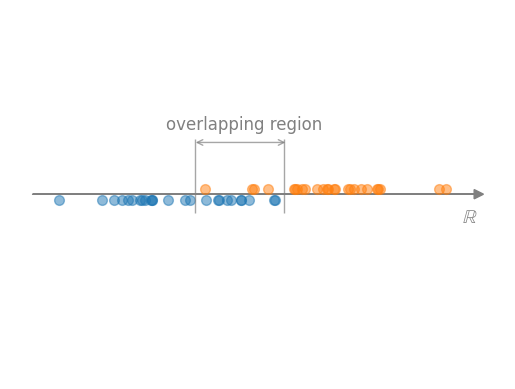

In [76]:

np.random.seed(123)
Npoints = 25
t = np.zeros(Npoints)
x = np.random.normal(loc=0.0, scale=1.0, size=Npoints)
y = np.random.normal(loc=3.5, scale=1.0, size=Npoints)
fig,ax = plt.subplots()
ax.plot(x, t-0.03, 'o', alpha=0.5, markersize=7)
ax.plot(y, t+0.03, 'o', alpha=0.5, markersize=7)
#ax.axhline(0, ls='-', color='gray', alpha=0.5)
ax.set_ylim(-1,1)
ax.axis("off")
ax.arrow(-3,0,   # starting point (x,y)
         9.5, 0,   # direction vector (dx, dy)
         head_width=0.05, head_length=0.2,
         fc='gray', ec='gray')
ax.text(6.4, -0.15, r'$\mathbb{R}$', color='gray', fontsize=14, ha='center')
ax.vlines(x=0.5, ymin=-0.1, ymax=0.3, color="grey", linewidth=1, alpha=0.7)
ax.vlines(x=2.4, ymin=-0.1, ymax=0.3, color="grey", linewidth=1, alpha=0.7)

ax.annotate("",
            xy=(2.5, 0.28), xytext=(0.45, 0.28),
            arrowprops=dict(arrowstyle="<->", lw=1, color="grey", alpha=0.7))
ax.text(1.55,0.35, "overlapping region", fontsize=12, color="gray", rotation=0, ha='center')
fig.savefig('Pics/overlapping_data.png', transparent=True)
plt.show()


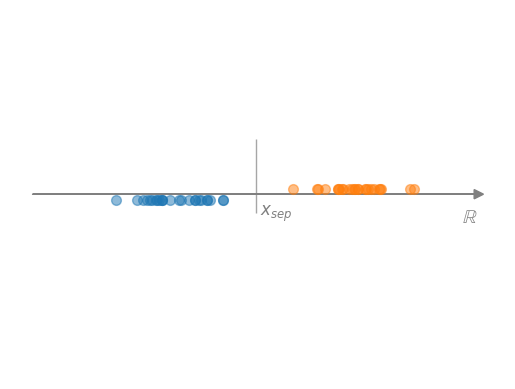

In [87]:

np.random.seed(123)
Npoints = 25
t = np.zeros(Npoints)
x = np.random.normal(loc=0.0, scale=0.5, size=Npoints)
y = np.random.normal(loc=4,   scale=0.5, size=Npoints)
fig,ax = plt.subplots()
ax.plot(x, t-0.03, 'o', alpha=0.5, markersize=7)
ax.plot(y, t+0.03, 'o', alpha=0.5, markersize=7)
#ax.axhline(0, ls='-', color='gray', alpha=0.5)
ax.set_ylim(-1,1)
ax.axis("off")
ax.arrow(-3,0,   # starting point (x,y)
         9.5, 0,   # direction vector (dx, dy)
         head_width=0.05, head_length=0.2,
         fc='gray', ec='gray')
ax.text(6.4, -0.15, r'$\mathbb{R}$', color='gray', fontsize=14, ha='center')
ax.vlines(x=1.8, ymin=-0.1, ymax=0.3, color="grey", linewidth=1, alpha=0.7)
ax.text(1.9,-0.05, r"$x_{sep}$", fontsize=12, color="gray", rotation=0, ha='left', va='top')
fig.savefig('Pics/separable_data.png', transparent=True)
plt.show()


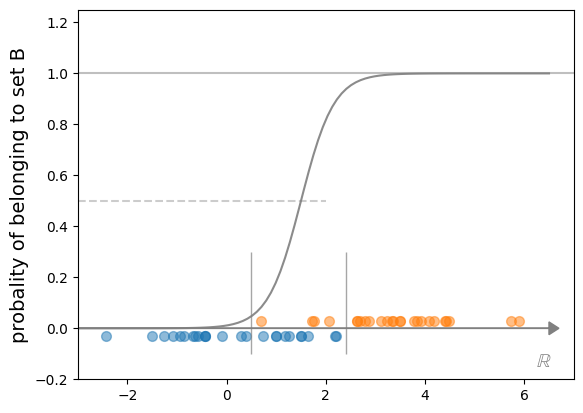

In [119]:

np.random.seed(123)
Npoints = 25
t = np.zeros(Npoints)
x = np.random.normal(loc=0.0, scale=1.0, size=Npoints)
y = np.random.normal(loc=3.5, scale=1.0, size=Npoints)
fig,ax = plt.subplots()
ax.plot(x, t-0.03, 'o', alpha=0.5, markersize=7)
ax.plot(y, t+0.03, 'o', alpha=0.5, markersize=7)

s = np.linspace(-3,6.5,101)
w=3
ax.plot(s, np.exp(w*(s-1.5))/(1+np.exp(w*(s-1.5))), color='tab:grey', alpha=0.9)

ax.axhline(1, ls='-', color='gray', alpha=0.5)
s1 = np.linspace(-3,2,5)
v1 = np.zeros_like(s1)
ax.plot(s1,0.5+v1, '--', color='gray', alpha=0.4)
ax.set_ylim(-0.2,1.25)
ax.set_xlim(-3,7)
#ax.axis("off")
ax.arrow(-3,0,   # starting point (x,y)
         9.5, 0,   # direction vector (dx, dy)
         head_width=0.05, head_length=0.2,
         fc='gray', ec='gray')
ax.text(6.4, -0.15, r'$\mathbb{R}$', color='gray', fontsize=14, ha='center')
ax.vlines(x=0.5, ymin=-0.1, ymax=0.3, color="grey", linewidth=1, alpha=0.7)
ax.vlines(x=2.4, ymin=-0.1, ymax=0.3, color="grey", linewidth=1, alpha=0.7)
ax.set_ylabel("probality of belonging to set B", fontsize=14)

fig.savefig('Pics/probabilistic_classification.pdf')
plt.show()


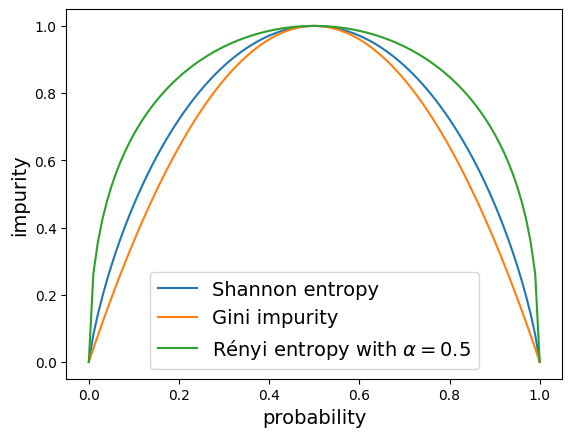

In [29]:
def renyi_distribution(alpha):
    def f(p):
        if alpha == 1:
            return -p*np.log2(p+1e-10)-(1-p)*np.log2(1-p+1e-10)
        else:
            return 1/(1-alpha)*np.log2(p**alpha + (1-p)**alpha)
    return f

p = np.linspace(0,1,101)
fig,ax = plt.subplots()
ax.plot(p, -p*np.log2(p+1e-10)-(1-p)*np.log2(1-p+1e-10), label='Shannon entropy')
ax.plot(p, 4*p*(1-p), label='Gini impurity')
R = renyi_distribution(0.5)
ax.plot(p, R(p), label=r'Rényi entropy with $\alpha=0.5$')
ax.set_xlabel('probability', fontsize=14)
ax.set_ylabel('impurity', fontsize=14)
ax.legend(fontsize=14)
fig.savefig('Pics/impurity_measures.pdf', transparent=True)
plt.show()

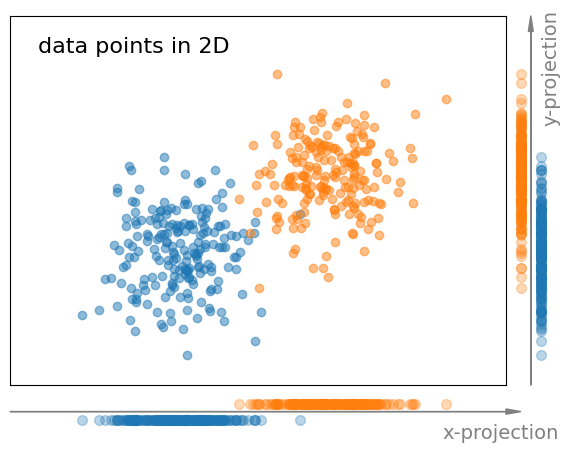

In [177]:
np.random.seed(122)
Npoints = 200
x = np.random.normal(loc=0.0, scale=0.7, size = (2,Npoints))
y = np.random.normal(loc=0.0, scale=0.7, size = (2,Npoints))
y[0] += 3
y[1] += 1.5
fig,ax = plt.subplots()
ax.plot(*x, 'o', alpha=0.5)
ax.plot(*y, 'o', alpha=0.5)
ax.set_ylim(-2.5,4.5)
ax.set_xlim(-3.5,6.5)
ax.set_xticks([])
ax.set_yticks([])
ax.text(-1, 3.8, 'data points in 2D', fontsize=16, ha='center')
yvertproj = -3
ax.arrow(-3.5, yvertproj,   # starting point (x,y)
         10, 0,   # direction vector (dx, dy)
         head_width=0.1, head_length=0.3,
         fc='gray', ec='gray', clip_on=False)
t = np.zeros(Npoints) +yvertproj
ax.plot(x[0], t-0.15, 'o', color='C0', alpha=0.3, markersize=7, clip_on=False)
ax.plot(y[0], t+0.15, 'o', color='C1', alpha=0.3, markersize=7, clip_on=False)
ax.text(6.4, yvertproj-0.5, 'x-projection', color='gray', fontsize=14, ha='center')

xhorproj = 7
ax.arrow(xhorproj,-2.5,   # starting point (x,y)
         0, 6.7,   # direction vector (dx, dy)
         head_width=0.1, head_length=0.3,
         fc='gray', ec='gray', clip_on=False)
t = np.zeros(Npoints) +xhorproj
ax.plot(t+0.2, x[1], 'o', color='C0', alpha=0.3, markersize=7, clip_on=False)
ax.plot(t-0.2, y[1], 'o', color='C1', alpha=0.3, markersize=7, clip_on=False)
ax.text(xhorproj+0.4, 2.5, 'y-projection', color='gray', fontsize=14, ha='center', rotation=90)
fig.savefig('Pics/2D_data_projection.pdf', bbox_inches='tight', transparent=True)
plt.show()

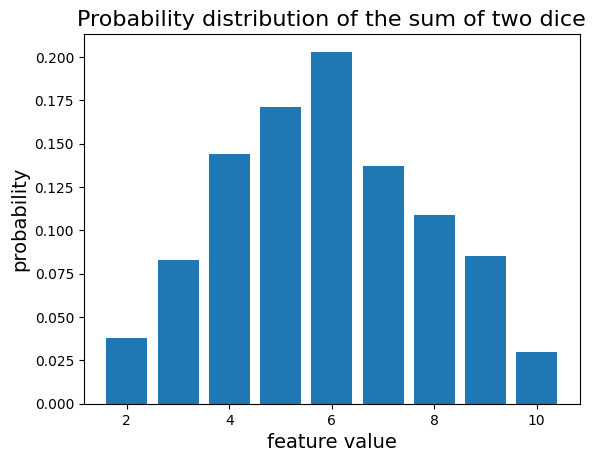

In [26]:
Ndata = 1000
data = np.random.randint(1,6,size=(Ndata,2))
feature = data[:,0] + data[:,1]
fmax = int(max(feature))
fmin = int(min(feature))
bins = np.zeros(fmax-fmin+1)
for f in feature:
    bins[int(f-fmin)] += 1
bins/=Ndata
fig,ax = plt.subplots()
ax.bar(np.arange(fmin,fmax+1),bins)
ax.set_xlabel('feature value', fontsize=14)
ax.set_ylabel('probability', fontsize=14)
ax.set_title('Probability distribution of the sum of two dice', fontsize=16)
fig.savefig('Pics/feature_histogram.pdf', transparent=True)
plt.show()


In [46]:
def SH(p):
    return -p*np.log2(p+1e-10)
def information(p0):
    pX = np.sum(p0, axis=1)
    pY = np.sum(p0, axis=0)
    pXY = np.reshape(p0, -1)
    allp = [pXY,pX,pY]

    allH = []
    for p in allp:
        H = 0
        for pi in np.reshape(p, -1):
            H += SH(pi)
        allH.append(H)
    return {
        "pXY" : pXY,
        "pX" : pX,
        "pY" : pY,
        "H(X,Y)" : allH[0],
        "H(X)" : allH[1],
        "H(Y)" : allH[2],
        "I(X;Y)" : allH[1] + allH[2] - allH[0]
    }

In [51]:
p0=np.array([[1/4,1/4],[1/4,1/4]])
print(np.sum(p0))
information(p0)

1.0


{'pXY': array([0.25, 0.25, 0.25, 0.25]),
 'pX': array([0.5, 0.5]),
 'pY': array([0.5, 0.5]),
 'H(X,Y)': np.float64(1.9999999994229218),
 'H(X)': np.float64(0.9999999997114609),
 'H(Y)': np.float64(0.9999999997114609),
 'I(X;Y)': np.float64(0.0)}

In [49]:
p0=np.array([[1/3,1/6],[1/4,1/4]])
print(np.sum(p0))
information(p0)

1.0


{'pXY': array([0.33333333, 0.16666667, 0.25      , 0.25      ]),
 'pX': array([0.5, 0.5]),
 'pY': array([0.58333333, 0.41666667]),
 'H(X,Y)': np.float64(1.9591479164501666),
 'H(X)': np.float64(0.9999999997114609),
 'H(Y)': np.float64(0.9798687563626138),
 'I(X;Y)': np.float64(0.020720839623908027)}

In [52]:
5/12

0.4166666666666667